In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


**Descrição do Dado**

- Age : idade do paciente
- Sex : gênero do paciente
- cp : tipo de dor no peito (0-3)
- trtbps : pressão sanguinea no repouso (in mm Hg)
- chol : colesterol em mg/dl,via sensor BMI
- fbs : açucar no sangue em jejum > 120 mg/dl,(1;0)
- rest_ecg : resultados exame eletrocardioimagem 
- thalachh: max taxa cardíaca 
- exng: exercicio induzido angina (1;0)
- caa: número máximo de vasos (0-3)
- output : (1;0)

# Manipulando DataFrames


Lendo e descrevendo a base de dados no ambiente

In [3]:
# Conferindo as dimensões da base de dados
df.shape

(303, 11)

In [4]:
# Conferindo quanis são variáveis
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'],
      dtype='object')

Criando e deletanto colunas/variáveis base de dados

In [5]:
df['teste'] = df['age'] + 10
df.drop(['teste'], axis = 1, inplace=True)

Funções loc e iloc

In [6]:
#df.loc[3] # podemos chamar uma linha pelo seu índice
#df.loc[[0,1,2]] # por um array de índices
#df.loc[0:3] # por um range
#df.loc[0:3, ['gender', 'bmi']] # além dos indices, podemos selecionar colunas
#df.iloc[3] # já a função iloc seleciona pela posição, e não pelo índice
df.iloc[:, 2] # mesma coisa para a coluna

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

Seleção por condicional

In [7]:
print(f'Quantidade de pessoas com mais de 50 anos:{len(df[df["age"] > 50])}')
df[df['age'] > 50].head()

Quantidade de pessoas com mais de 50 anos:208


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1


Note que nesta base o número da linha não é mais igual ao índice.

# Estatística Descritiva

- *Variável categórica* : As variáveis categóricas contêm um número finito de categorias ou grupos distintos. Os dados categóricos podem não ter uma ordem lógica. Por exemplo, os preditores categóricos incluem gênero, tipo de material e método de pagamento.


- *Variável numérica* :
    - Variáveis discretas: são variáveis numéricas que têm um número contável de valores entre quaisquer dois valores. Uma variável discreta é sempre numérica. Por exemplo, o número de reclamações de clientes ou o número de falhas ou defeitos.
    - variável contínua : Variáveis contínuas são variáveis numéricas que têm um número infinito de valores entre dois valores quaisquer. Uma variável contínua pode ser numérica ou de data/hora. Por exemplo, o comprimento de uma peça ou a data e hora em que um pagamento é recebido.

In [8]:
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
caa         int64
output      int64
dtype: object

#### Distribuição a variável target/resposta

In [9]:
pd.DataFrame(df.groupby(['output']).count())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
output,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165


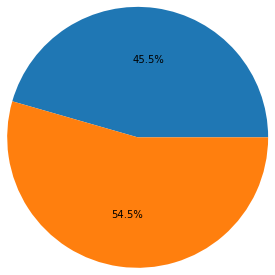

In [10]:
# Transformar a visão acima em um dataframe, dessa forma, 
# podemos selecionar a porção de dados que queremos no gráfico
x = pd.DataFrame(df.groupby(['output']).count()) 
# plt indica o pacote matplotlib e pie indica que queremos o gráfico de pizza
plt.pie(x['sex'], autopct='%1.1f%%',  radius=1.5)
plt.show()

#### Descrevendo as variáveis numéricas

In [11]:
# Lembrando nem tudo que é número é uma variável numérica 
num_vars = ['age','trtbps', 'chol', 'thalachh']
df[num_vars].describe()

,age,trtbps,chol,thalachh
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


**Observação:** Com a função describe já é possível ter uma ideia do "shape" da distribuição. Note que na variável *chol* a mediana é menor que a média e a variável *thalachh* a mediana é maio que a média. Vamos verificar o que isso pode significar

#### Histogramas

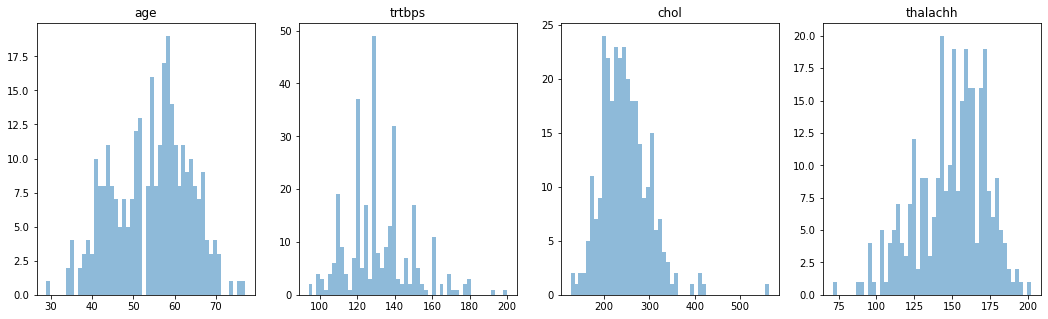

In [12]:
fig = plt.figure(figsize =(18, 5))

plt.subplot(1, 4, 1) # O recurso subplot te permite alinhar as imagens como desejar, aqui serão 1 linha e 4 colunas
plt.hist(df['age'], alpha=0.5, bins = 50)
plt.title('age')

plt.subplot(1, 4, 2)
plt.hist(df['trtbps'], alpha=0.5, bins = 50)
plt.title('trtbps')

plt.subplot(1, 4, 3)
plt.hist(df['chol'], alpha=0.5, bins = 50)
plt.title('chol')

plt.subplot(1, 4, 4)
plt.hist(df['thalachh'], alpha=0.5, bins = 50)
plt.title('thalachh')

plt.show()

**Observação**: *chol* note uma leve assimetria para a direita, já em *thalachh* note uma leve assimetria para a esquerda. 

<div>
<center><img src="imgs/assimetria.jpg" width="600"/></center>
</div>

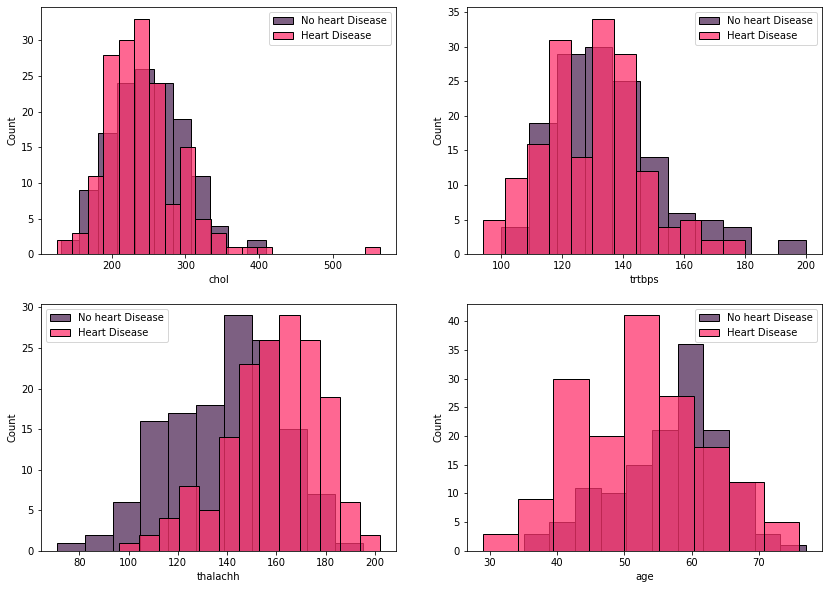

In [13]:
# Uma outra forma de ver a distribuição. Desta vez separando pela variável target
fig=plt.figure(figsize=(14, 10))
fig = plt.subplot(221)
sns.histplot(df[df['output'] == 0]["chol"],label='No heart Disease', color='#512b58') 
sns.histplot(df[df['output'] == 1]["chol"],label='Heart Disease', color='#fe346e')
plt.legend()

fig = plt.subplot(222)
sns.histplot(df[df['output'] == 0]["trtbps"], label='No heart Disease', color='#512b58') 
sns.histplot(df[df['output'] == 1]["trtbps"], label='Heart Disease', color='#fe346e') 
plt.legend()

fig = plt.subplot(223)
sns.histplot(df[df['output'] == 0]["thalachh"], label='No heart Disease', color='#512b58') 
sns.histplot(df[df['output'] == 1]["thalachh"], label='Heart Disease', color='#fe346e') 
plt.legend()

fig = plt.subplot(224)
sns.histplot(df[df['output'] == 0]["age"], label='No heart Disease', color='#512b58') 
sns.histplot(df[df['output'] == 1]["age"], label='Heart Disease', color='#fe346e') 
plt.legend()

#### BoxPlot

O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.

As medidas de estatísticas descritivas como o mínimo, máximo, primeiro quartil, segundo quartil ou mediana e o terceiro quartil formam o boxplot.

<div>
<center><img src="imgs/boxplot.png" width="600"/></center>
</div>

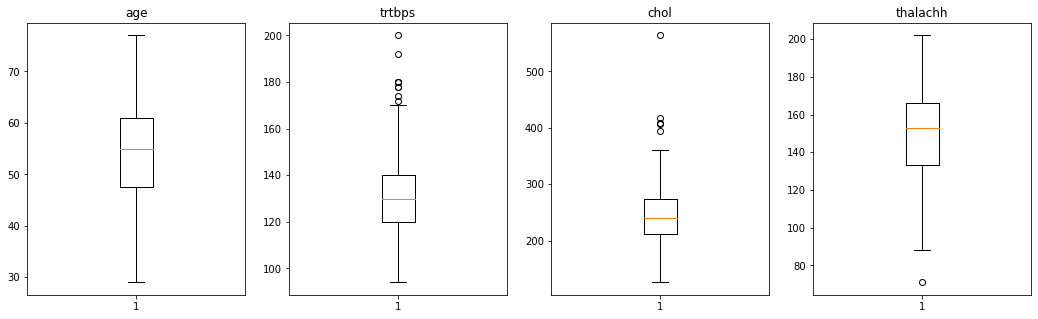

In [14]:
fig = plt.figure(figsize =(18, 5))

plt.subplot(1, 4, 1)
plt.boxplot(df['age'])
plt.title('age')

plt.subplot(1, 4, 2)
plt.boxplot(df['trtbps'])
plt.title('trtbps')

plt.subplot(1, 4, 3)
plt.boxplot(df['chol'])
plt.title('chol')

plt.subplot(1, 4, 4)
plt.boxplot(df['thalachh'])
plt.title('thalachh')

plt.show()

**Obsevação** Note que o boxplot, além de informações sobre o "shape" da distribuição, também nos fornece a visualização dos outliers.

**Dica**: Algumas vezes podemos excluir os outliers, mas muitas vezes são casos especiais que devem ser considerados e investigados. Uma boa dica que o boxplot fornece é a partir de qual range o outlier se encontra, sendo assim, podemos usar por exemplo a seleção por condicional que vimos anteriormente e analisar o que está acontecendo.

#### Descrevendo as variáveis categóricas


In [15]:
# Note que algumas variáveis apesar de serem números, na verdade representam uma categoria
categ_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa']

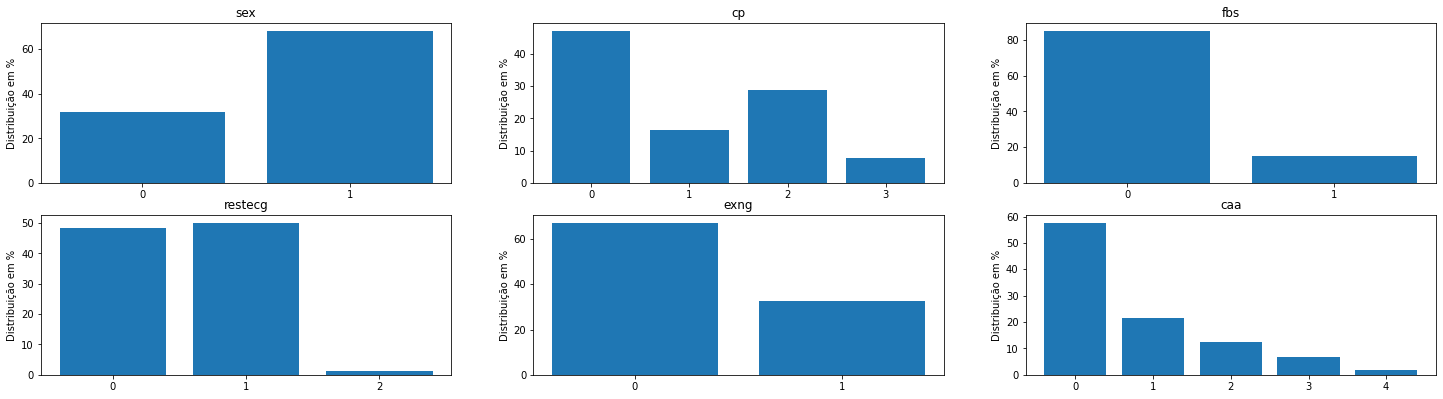

In [16]:
fig = plt.figure(figsize =(25, 10))
for i in range(len(categ_vars)):
  temp = pd.DataFrame(df.groupby(categ_vars[i]).count()['output'])
  temp['perc'] = (temp['output'] / temp['output'].sum()) * 100
  plt.subplot(3, 3, i+1)
  plt.bar(range(len(temp.index)), list(temp['perc']), tick_label=temp.index)
  plt.title(categ_vars[i])
  plt.ylabel("Distribuição em %")

plt.show()

# Análises de Correlação

*Correlação de Pearson*: O coeficiente de correlação de Pearson (r), também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis contínuas ou discretas e exprime o grau de correlação através de valores situados entre -1 e 1

<div>
<center><img src="imgs/pearson.png" width="800"/></center>
</div>

Como deveria se parecer duas variáveis que são correlacionadas?

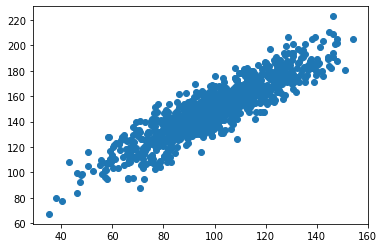

In [17]:
from numpy.random import seed
from numpy.random import randn

var1 = 20 * randn(1000) + 100
var2 = var1 + (10 * randn(1000) + 50)

plt.scatter(var1, var2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

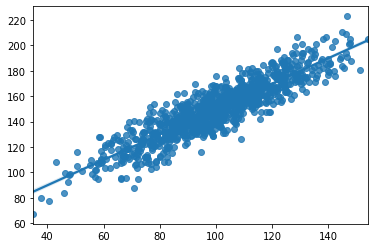

In [18]:
sns.regplot(var1, var2)

**Correlação das variáveis numéricas, com relação a resposta**

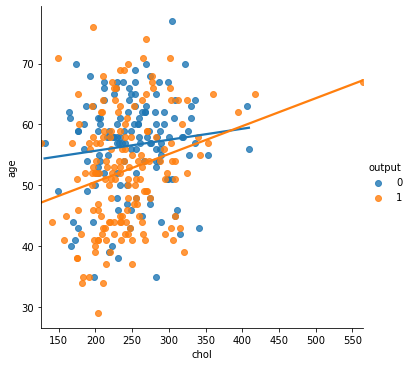

In [30]:
sns.lmplot(x="chol", y="age", hue="output", ci=None, data=df)
# Devemos fazer com todas as variáveis

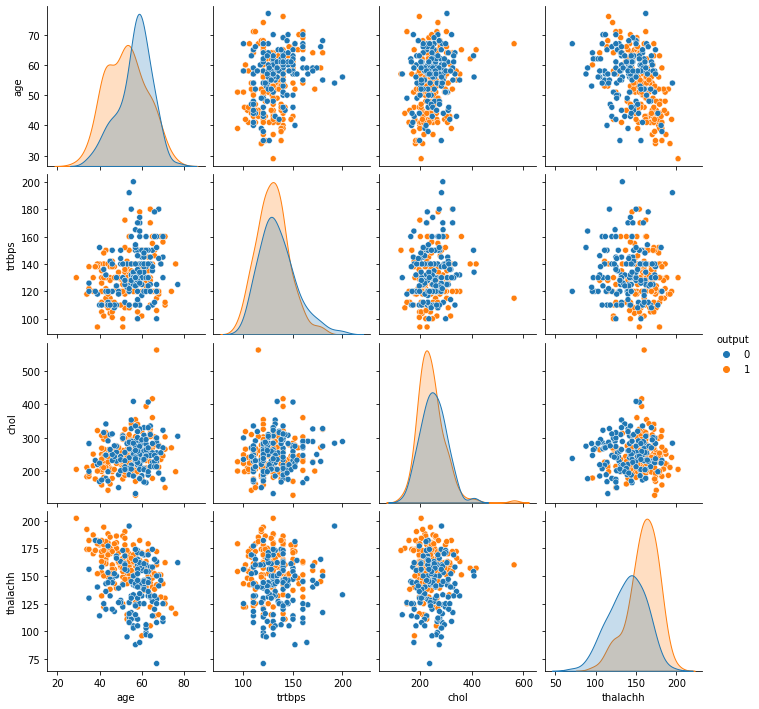

In [20]:
# Função pairplot correlaciona as variáveis duas a duas
sns.pairplot(df[num_vars + ['output']], hue = 'output')

#### Coeficiente de Correlação

In [21]:
df[num_vars+['output']].corr()

,age,trtbps,chol,thalachh,output
age,1.000000,0.279351,0.213678,-0.398522,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,0.421741
output,-0.225439,-0.144931,-0.085239,0.421741,1.000000


Podemos dizer que os gráficos de pairplot e os coeficientes de correlação apresentam o mesmo resultado?

<AxesSubplot:>

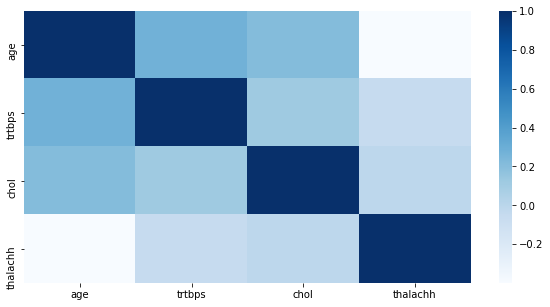

In [22]:
# Uma forma mais visual de verificar a correlação
plt.figure(figsize=(10,5))
sns.heatmap(df[num_vars].corr(),cmap="Blues")

#### Correlação de variáveis categóricas com a resposta

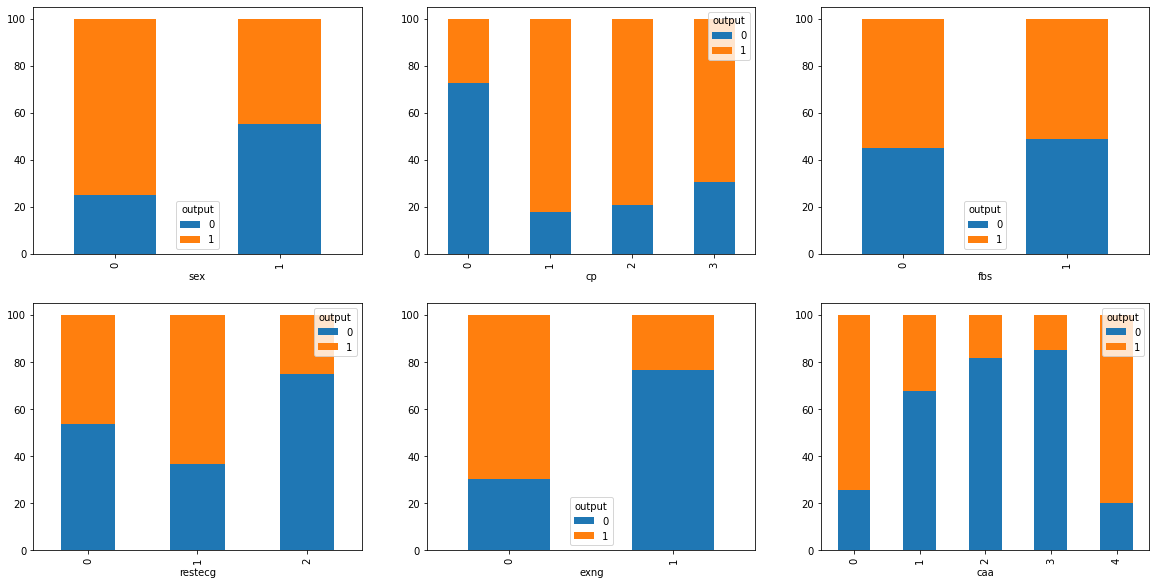

In [23]:
# Comparando as categóricas com a variável target
fig, axes = plt.subplots(nrows=2, ncols=3)
indexes = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]
for i in range(len(categ_vars)):
  c = df.groupby([categ_vars[i], 'output']).size()
  ((c / c.groupby(level=0).sum())*100).unstack().plot(kind='bar', ax=axes[indexes[i][0], indexes[i][1]], stacked=True, figsize=(20, 10))

#### Faz sentido calcular correlação com a variáveis categóricas ?

In [24]:
df[categ_vars+['output']].corr()

,sex,cp,fbs,restecg,exng,caa,output
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,0.118261,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,-0.181053,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,0.137979,-0.028046
restecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,-0.072042,0.137230
exng,0.141664,-0.394280,0.025665,-0.070733,1.000000,0.115739,-0.436757
caa,0.118261,-0.181053,0.137979,-0.072042,0.115739,1.000000,-0.391724
output,-0.280937,0.433798,-0.028046,0.137230,-0.436757,-0.391724,1.000000


Podemos confiar nestes resultados? No exemplo abaixo vamos fazer um teste de hipótese para verificar alguns dos resultados acima. 

**Atenção!** Tome muito cuidado ao utilizar testes de hipótese, preste atenção em quando podemos utilizá-lo, e seja muito cauteloso com as interpretações. Lembre sempre de ponderar o tamanho da amostra que você está trabalhando.

#### O teste Qui-Quadrado

O teste qui-quadrado mede a dependência entre duas variáveis. Sendo assim, neste teste:
- H0: As duas variáveis não são correlacionadas, são independentes
Caso o p-valor retorne > 0.05, aceitamos H0.  

*Para saber mais:* https://www.mathsisfun.com/data/chi-square-test.html

In [25]:
from scipy.stats import chi2_contingency

In [26]:
crosstab=pd.crosstab(index=df['sex'],columns=df['output'])
print(crosstab)
print('p-valor:', chi2_contingency(crosstab)[1])

output    0   1
sex            
0        24  72
1       114  93
p-valor: 1.8767776216941503e-06


In [27]:
crosstab=pd.crosstab(index=df['fbs'],columns=df['output'])
print(crosstab)
print('p-valor:', chi2_contingency(crosstab)[1])

output    0    1
fbs             
0       116  142
1        22   23
p-valor: 0.7444281114149577


In [28]:
crosstab=pd.crosstab(index=df['caa'],columns=df['output'])
print(crosstab)
print('p-valor:', chi2_contingency(crosstab)[1])

output   0    1
caa            
0       45  130
1       44   21
2       31    7
3       17    3
4        1    4
p-valor: 2.712470211959332e-15


Em primeiro lugar, o teste não mostra "a força" da correlação, como faz a correlação. Apenas diz que existe dependência ou não. Comparar os resultados é difícil, o que podemos afirmar é que o qui-quadrado trabalha com proporções, e a correlações em categóricas (quando transformadas para "números") também acaba olhando para estas proporções. No entanto, é conceitualmente errado avaliar correlação desta forma, até porque para variáveis com mais de uma categoria, a avaliação desta "proporção" se torna mais complexa.

**Um teste de hipótese quando bem aplicado é sempre mais confiável.**